In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../Data/Spotify_with_genre.csv')

In [3]:
df.head()

,artist_name,track_name,artist_pop,popularity,release_date,genre
0,A Thousand Horses,Preachin' To The Choir,37.0,0.0,2017-06-02,Rap
1,Water Liars,You Work Days I Work Nights,29.0,10.0,2012,dnb
2,Chambao,Sera,44.0,31.0,2007-11-06,Rap
3,Jeezy,Big Shit Poppin,69.0,19.0,2007-08-07,Rap
4,La Arrolladora Banda El Limón De Rene Camacho,No La Voy A Engañar,74.0,54.0,2012,Rap


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()

In [6]:
df['artist_name'] = label_encoder.fit_transform(df['artist_name'])
df['genre'] = label_encoder.fit_transform(df['genre'])

In [7]:
df['release_date']=pd.to_datetime(df['release_date'], errors='coerce')

In [8]:
df.dropna(subset=['release_date'], inplace=True)

In [9]:
df['year'] = df['release_date'].dt.year

In [10]:
df.drop(columns=['release_date'], inplace=True)

In [11]:
df.head()

,artist_name,track_name,artist_pop,popularity,genre,year
0,34,Preachin' To The Choir,37.0,0.0,1,2017
1,2911,You Work Days I Work Nights,29.0,10.0,2,2012
2,485,Sera,44.0,31.0,1,2007
3,1268,Big Shit Poppin,69.0,19.0,1,2007
4,1525,No La Voy A Engañar,74.0,54.0,1,2012


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
numerical_features = ['artist_pop', 'popularity']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [16]:
features_for_clustering = ['artist_pop', 'popularity', 'year', 'genre']

In [17]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)  # Adjust eps and min_samples as per your data

In [18]:
# Fit DBSCAN clustering
clusters = dbscan.fit_predict(df[features_for_clustering])

In [19]:
# Add cluster labels to dataframe
df['cluster'] = clusters

In [20]:
df

,artist_name,track_name,artist_pop,popularity,genre,year,cluster
0,34,Preachin' To The Choir,0.37,0.000000,1,2017,0
1,2911,You Work Days I Work Nights,0.29,0.108696,2,2012,-1
2,485,Sera,0.44,0.336957,1,2007,1
3,1268,Big Shit Poppin,0.69,0.206522,1,2007,1
4,1525,No La Voy A Engañar,0.74,0.586957,1,2012,2
...,...,...,...,...,...,...,...
5019,2440,Children of the Wild (feat. Mako),0.58,0.478261,7,2016,39
5020,193,Twenty Years,0.43,0.380435,1,2008,33
5021,2299,Ride It,0.59,0.358696,8,2017,99
5022,1689,Loot My Body,0.34,0.369565,0,2013,25


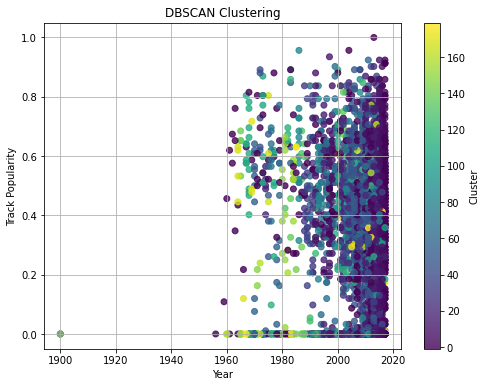

In [21]:
import matplotlib.pyplot as plt

# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['popularity'], c=df['cluster'], cmap='viridis', marker='o', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [22]:
# Calculate centroid values
centroid_values = df.groupby('cluster')[['artist_pop', 'popularity', 'year', 'genre']].mean()

print("Centroid values:")
print(centroid_values)

Centroid values:
         artist_pop  popularity    year     genre
cluster                                          
-1         0.521961    0.356405  1995.0  3.980392
 0         0.568000    0.283972  2017.0  1.000000
 1         0.529293    0.250000  2007.0  1.000000
 2         0.569395    0.242724  2012.0  1.000000
 3         0.558438    0.345788  2010.0  0.000000
...             ...         ...     ...       ...
 175       0.300000    0.326087  2012.0  3.000000
 176       0.595000    0.630435  1985.0  1.000000
 177       0.595000    0.445652  2016.0  5.000000
 178       0.610000    0.000000  1967.0  1.000000
 179       0.275000    0.375000  2011.0  5.000000

[181 rows x 4 columns]


In [23]:
# Count the number of clusters formed
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise points if present (-1 indicates noise)
print("Number of clusters formed:", num_clusters)

Number of clusters formed: 180


Hierarchical clustering:

In [24]:
from sklearn.cluster import AgglomerativeClustering

In [25]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hierarhical_clusters = hc.fit_predict(df[features_for_clustering])

In [26]:
#Add cluster labels to dataframe
df['hierarchical_cluster'] = hierarhical_clusters

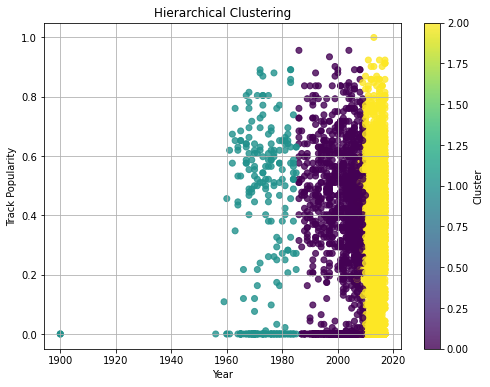

In [27]:
# Visualize clusters
plt.figure(figsize=(8, 6))
plt.scatter(df['year'], df['popularity'], c=df['hierarchical_cluster'], cmap='viridis', marker='o', alpha=0.8)
plt.xlabel('Year')
plt.ylabel('Track Popularity')
plt.title('Hierarchical Clustering')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [28]:
# Count the number of clusters formed
num_clusters_hc = len(set(hierarhical_clusters))

print("Number of clusters formed by hierarchical clustering:", num_clusters_hc)

Number of clusters formed by hierarchical clustering: 3


In [29]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for DBSCAN
silhouette_score_dbscan = silhouette_score(df[features_for_clustering], clusters)

# Calculate silhouette score for hierarchical clustering
silhouette_score_hc = silhouette_score(df[features_for_clustering], df['hierarchical_cluster'])

print("Silhouette score for DBSCAN:", silhouette_score_dbscan)
print("Silhouette score for hierarchical clustering:", silhouette_score_hc)


Silhouette score for DBSCAN: 0.5800870288897448
Silhouette score for hierarchical clustering: 0.5771894355576237


In [ ]:
import cvxpy as cp
import numpy as np

# Generate random data
np.random.seed(0)
m = 10
n = 5
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define variables
x = cp.Variable(n)

# Define objective function
objective = cp.Minimize(cp.sum_squares(A @ x - b))

# Define constraint: Norm of x <= 1
constraints = [cp.norm(x) <= 1]

# Formulate and solve problem
problem = cp.Problem(objective, constraints)
problem.solve()

# Display results
print("Optimal value (minimum sum of squares):", problem.value)
print("Optimal solution x:", x.value)
